# <center><b>Drug Classification with KNN Algorithm <b><center>

-----
## **Contents**
-----
**1.** [**Problem Statement**](#section1)<br>
**2.** [**Importing necessary Libraries**](#section2)<br>
**3.** [**Data loading and description**](#section3)<br>
**4.** [**Exploratory Data Analysis**](#section4)<br>
**5.** [**Model Development and Evaluation**](#section5)<br>
**6.** [**Hyperparameter Tuning**](#section6)<br>
**7.** [**Conclusion**](#section7)<br>


---
<a name = Section1></a>
### **1.** Problem Statement
---

 - The task is to predict the outcome of drug that might be accurate for the patient given the **Age**, **Sex**, **BP**, **Cholesterol** and **Na_to_K** Variables.

---
<a name = Section2></a>
### 2. Importing necessary Libraries
---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

---
<a name = Section3></a>
### 3. Data loading and description
---

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **Age**   | Age of the patient |
|02| **Sex**      | Gender of patient|
|03| **BP**        | Blood Pressure level of patient|
|04| **Cholesterol**          | Cholesterol level of patient|
|05| **Na_to_K**           | Sodium to Potassium ration|
|06| **Drug**           | Drugs for patient. Five types of drugs. DrugA, DrugB, DrugC,DrugX, DrugY |                           

In [2]:
drug = pd.read_csv("C:/Users/Yamini/OneDrive - Colosseum Group/Documents/datasets/drug_classification.csv")
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
print("Shape of the dataset:", drug.shape)
print("Columns of the dataset:",drug.columns)

Shape of the dataset: (200, 6)
Columns of the dataset: Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [4]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


**Observations**:
- The dataset does not have null values.
- 4 columns belong to object datatype, 1 column belongs to float and another column belong to int datatype.

In [5]:
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


**Observations**:
- 50% of the People belong to 45 years old. Minimun age is 15 and maximum age is 74 years old.
- The average Sodium to Potassium Ration is 16.0844. Minimum ration is 6.269 and maximum ration is 38.247.

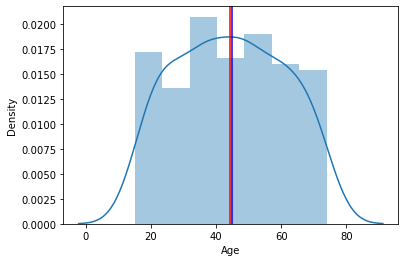

In [6]:
sns.distplot(drug["Age"])
plt.axvline(drug["Age"].mean(),color = "red")
plt.axvline(drug["Age"].median(),color = "blue")

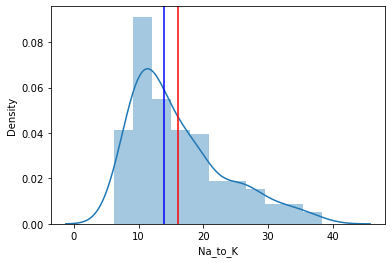

In [7]:
sns.distplot(drug["Na_to_K"])
plt.axvline(drug["Na_to_K"].mean(),color = "red")
plt.axvline(drug["Na_to_K"].median(),color = "blue")

In [8]:
drug['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [9]:
drug['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [10]:
drug['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [11]:
drug['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

---
<a name = Section4></a>
### 4. Exploratory Data Analysis
---

<AxesSubplot:>

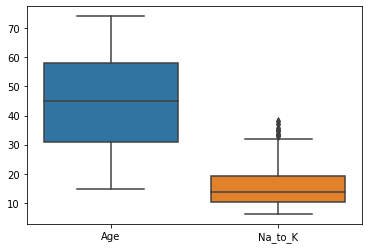

In [12]:
sns.boxplot(data = drug)

**Observations**: There are no outliers for **Age** but there are few outliers for **Na_to_K**.

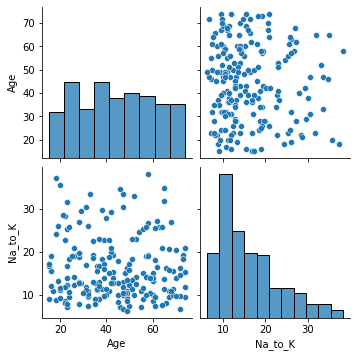

In [13]:
sns.pairplot(data = drug)

**Countplot**

<AxesSubplot:xlabel='Drug', ylabel='count'>

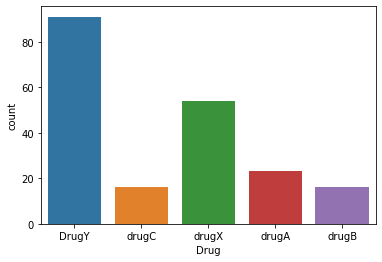

In [14]:
sns.countplot(drug['Drug'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

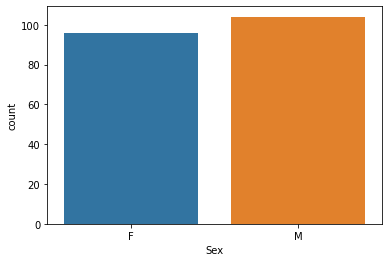

In [15]:
sns.countplot(drug['Sex'])

<AxesSubplot:xlabel='BP', ylabel='count'>

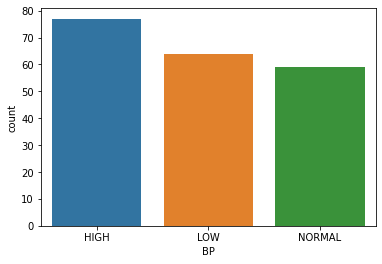

In [16]:
sns.countplot(x = drug['BP'])

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

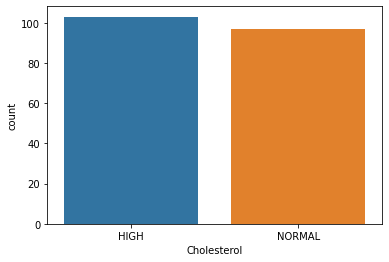

In [17]:
sns.countplot(drug['Cholesterol'])

1. What is the relationship between **Age**,**Sex** and **Drug** ?

<AxesSubplot:xlabel='Drug', ylabel='Age'>

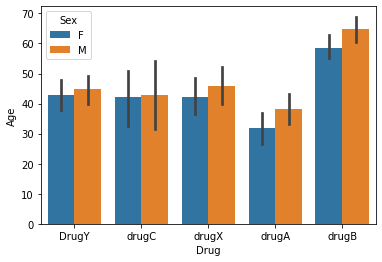

In [18]:
sns.barplot(x = "Drug",y = "Age", data = drug, hue = "Sex")

2. What is the relationship between **Na_to_k**, **Cholesterol** and **Drug** ?

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

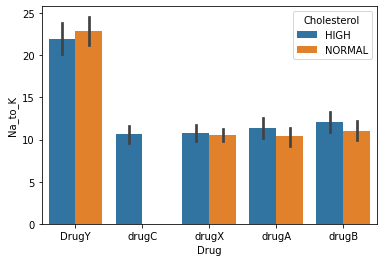

In [19]:
sns.barplot(x = "Drug", y = "Na_to_K", data = drug, hue="Cholesterol") 

**Label Encoding**

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
drug['Sex'] =le.fit_transform(drug["Sex"])
drug['BP'] = le.fit_transform(drug["BP"])
drug['Cholesterol'] = le.fit_transform(drug["Cholesterol"])
drug['Drug'] = le.fit_transform(drug["Drug"])

In [21]:
X = drug.drop('Drug', axis = 1)
y = drug['Drug']

print("Shape of X", X.shape)
print("Shape of y", y.shape)

Shape of X (200, 5)
Shape of y (200,)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

**Feature scaling**

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.loc[:] = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
<a name = Section5></a>
### 5. **Model development and Evaluation**
---

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric = "euclidean")
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [25]:
y_pred_train = knn.predict(X_train)

In [26]:
y_pred_test = knn.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9552238805970149
Test Accuracy: 0.8484848484848485


---
<a name = Section5></a>
### 6. Hyperparameter Tuning
---

In [28]:
param_grid_knn = {'n_neighbors':list(range(2,20)),
                 'metric':['minkowski','euclidean','manhattan'],
                 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                 'p':list(range(1,6)),
                 'weights':['uniform','distance']}

In [29]:
from sklearn.model_selection import GridSearchCV

best_scores = []
best_params = []


clf = KNeighborsClassifier(n_jobs = -1)
cv = GridSearchCV(estimator = clf, param_grid = param_grid_knn, cv = 5)
cv.fit(X_train,y_train)
best_scores.append(cv.best_score_)
best_params.append(cv.best_params_)

In [30]:
best_params

[{'algorithm': 'auto',
  'metric': 'minkowski',
  'n_neighbors': 15,
  'p': 1,
  'weights': 'distance'}]

In [31]:
knn_tuned = KNeighborsClassifier(algorithm = 'auto',metric = 'minkowski',n_neighbors = 17,p = 1,weights =  'distance')
knn_tuned.fit(X_train,y_train)
y_pred_train_tuned = knn_tuned.predict(X_train)
y_pred_test_tuned = knn_tuned.predict(X_test)

train_accuracy_tuned = accuracy_score(y_train, y_pred_train_tuned)
test_accuracy_tuned = accuracy_score(y_test, y_pred_test_tuned)

print("Train Accuracy:", train_accuracy_tuned)
print("Test Accuracy:", test_accuracy_tuned)

Train Accuracy: 1.0
Test Accuracy: 0.8939393939393939


---
<a name = Section7></a>
### 7 .Conclusion
---
- After Comparison between **with and without hyperparameter tuning**, The performance of KNN algorithm **without hyperparameter tuning is better than with hyperparameter tuning**.
- After hyperparameter tuning, the KNN model seems to be overfitting.
- **KNN model is predicting 84 % accurately** that the drug is for the required patient based on his Age, Sex, BP, Cholesterol and Na_to_K Variables.